In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
Company_df=pd.read_csv("Company_Data.csv")
Company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
Company_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
Company_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
Company_df1 = Company_df.copy()
Company_df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
Company_df1['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [7]:
Company_df1['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
Company_df1['US'] = Company_df1['US'].map({'Yes':1,'No': 0})
Company_df1['Urban'] = Company_df1['Urban'].map({'Yes':1,'No': 0})
Company_df1['ShelveLoc'] = Company_df1['ShelveLoc'].map({'Bad':0,'Good':2,'Medium':1})

In [9]:
Company_df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [10]:
Company_df1["sales"]="Minor"
Company_df1.loc[Company_df1["Sales"]>7.49,"sales"]="Major"
Company_df1.drop(["Sales"],axis=1,inplace=True)

In [11]:
Company_df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,Major
1,111,48,16,260,83,2,65,10,1,1,Major
2,113,35,10,269,80,1,59,12,1,1,Major
3,117,100,4,466,97,1,55,14,1,1,Minor
4,141,64,3,340,128,0,38,13,1,0,Minor


In [12]:
x = Company_df1.iloc[:,0:10]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
y = Company_df1.iloc[:,10]
y

0      Major
1      Major
2      Major
3      Minor
4      Minor
       ...  
395    Major
396    Minor
397    Minor
398    Minor
399    Major
Name: sales, Length: 400, dtype: object

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)

In [15]:
model = DecisionTreeClassifier(criterion='entropy',max_depth = 5) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

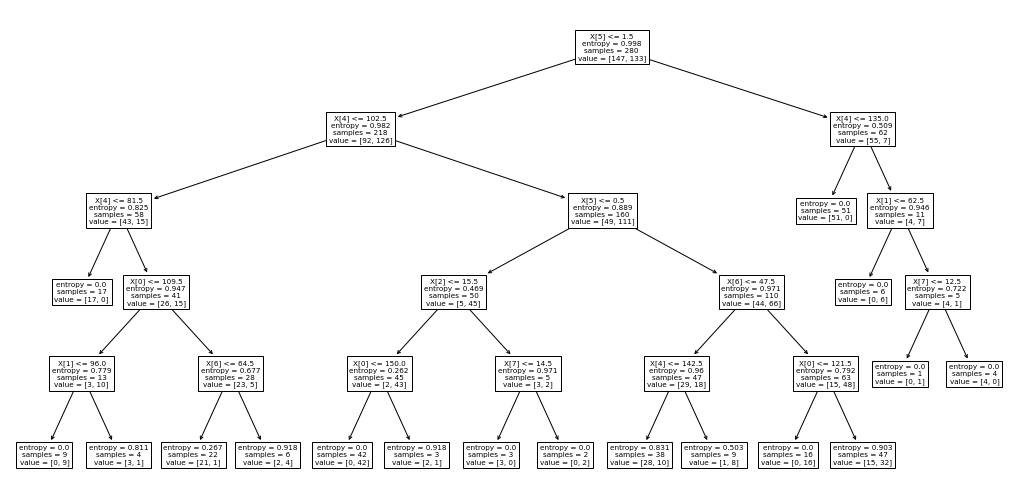

In [16]:
fig = plt.figure(figsize=(18,9))
tree.plot_tree(model)
plt.show()

In [17]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

Minor    67
Major    53
dtype: int64

In [18]:
preds

array(['Minor', 'Minor', 'Minor', 'Major', 'Major', 'Minor', 'Major',
       'Major', 'Minor', 'Major', 'Minor', 'Major', 'Minor', 'Major',
       'Major', 'Minor', 'Major', 'Major', 'Minor', 'Minor', 'Minor',
       'Major', 'Major', 'Major', 'Minor', 'Minor', 'Major', 'Minor',
       'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Minor',
       'Major', 'Minor', 'Minor', 'Major', 'Major', 'Minor', 'Minor',
       'Minor', 'Major', 'Minor', 'Minor', 'Major', 'Minor', 'Minor',
       'Minor', 'Minor', 'Minor', 'Minor', 'Minor', 'Minor', 'Major',
       'Minor', 'Minor', 'Major', 'Minor', 'Minor', 'Minor', 'Major',
       'Major', 'Minor', 'Major', 'Major', 'Minor', 'Major', 'Major',
       'Minor', 'Major', 'Major', 'Major', 'Minor', 'Minor', 'Minor',
       'Minor', 'Minor', 'Minor', 'Minor', 'Minor', 'Minor', 'Minor',
       'Minor', 'Major', 'Major', 'Minor', 'Minor', 'Major', 'Minor',
       'Minor', 'Major', 'Major', 'Major', 'Minor', 'Minor', 'Major',
       'Minor', 'Min

In [19]:
pd.crosstab(y_test,preds)

col_0,Major,Minor
sales,,
Major,33,19
Minor,20,48


In [20]:
np.mean(preds==y_test)*100

67.5

In [21]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
132,Major,Minor
390,Minor,Minor
310,Major,Minor
3,Minor,Major
248,Minor,Major
...,...,...
381,Minor,Major
53,Minor,Minor
229,Major,Major
303,Major,Major


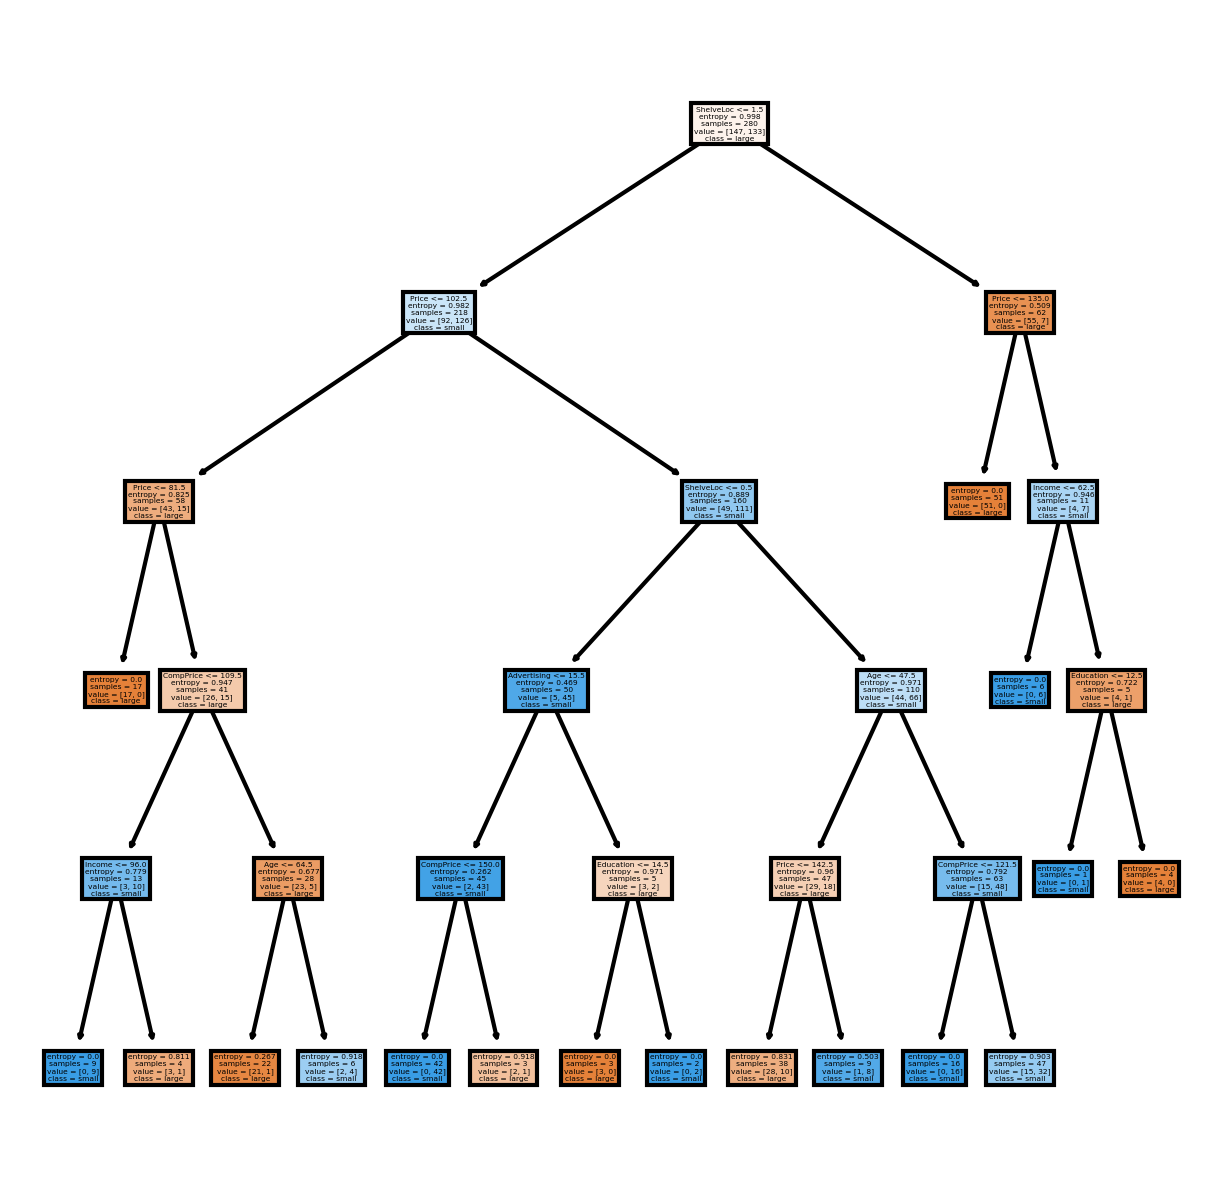

In [22]:
fn=['CompPrice','Income','Advertising' ,'Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['large','small']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(y_test,preds)
print(confusion_matrix)

[[33 19]
 [20 48]]


In [24]:
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

       Major       0.62      0.63      0.63        52
       Minor       0.72      0.71      0.71        68

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.68      0.68      0.68       120



In [25]:
accuracy_score(y_test,preds)*100

67.5

In [26]:
h = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
h

,feature,importance
4,Price,0.344571
5,ShelveLoc,0.249307
0,CompPrice,0.142936
6,Age,0.105530
1,Income,0.074534
7,Education,0.046120
2,Advertising,0.037003
3,Population,0.000000
8,Urban,0.000000
9,US,0.000000
